# Imports

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log10
import geopandas as gpd

# Loading Data

In [68]:
monkeypox_df = pd.read_csv('monkeypox.csv')
covid_df = pd.read_csv('covid.csv')

### Display the first few rows of each dataframe to verify loading

In [69]:

print(covid_df.columns)
print(monkeypox_df.columns)



Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')
Index(['location', 'date', 'iso_code', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')


## TODO: Data cleaning and standardization

In [70]:
TODO

NameError: name 'TODO' is not defined

## Constants

In [ ]:
who_alert_covid = pd.to_datetime("30-01-2020", dayfirst=True)
who_alert_monkeypox = pd.to_datetime("14-08-2024", dayfirst=True)

# First Graphs

## 1 Logged Cumulative Cases in the World

### 1.1 Data preparation

In [66]:
covid_df['Date_reported'] = pd.to_datetime(covid_df['Date_reported'])
monkeypox_df['date'] = pd.to_datetime(monkeypox_df['date'])

cumulative_cases_covid_any_country = pd.DataFrame(covid_df.groupby('Date_reported')['New_cases'].sum())
cumulative_cases_monkeypox_any_country = pd.DataFrame(monkeypox_df.groupby('date')['new_cases'].sum())

cumulative_cases_covid_any_country['cumulative_cases'] = cumulative_cases_covid_any_country['New_cases'].cumsum().apply(lambda x: log10(x))
cumulative_cases_monkeypox_any_country['cumulative_cases'] = cumulative_cases_monkeypox_any_country['new_cases'].cumsum().apply(lambda x: log10(x))

### 1.2 Plot

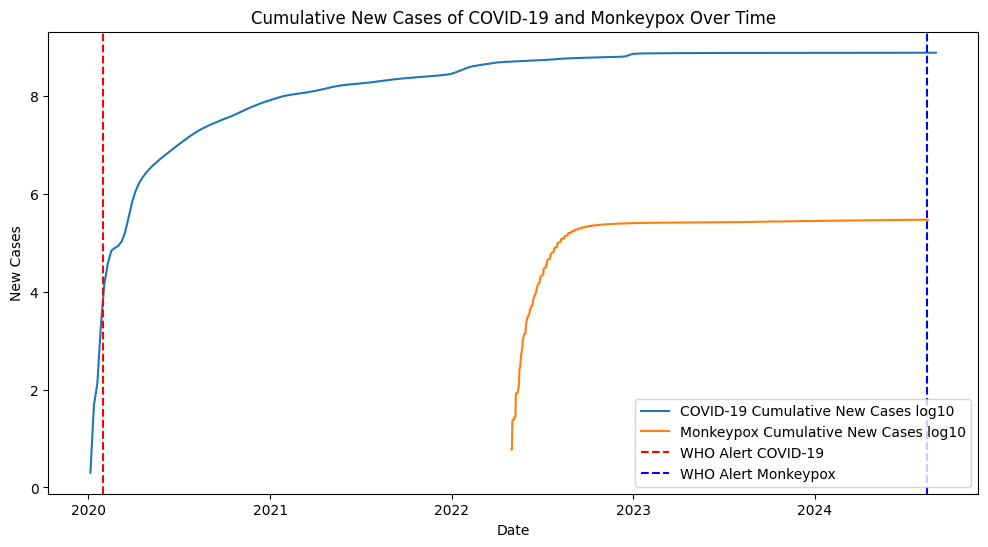

In [72]:
plt.figure(figsize=(12, 6))

plt.plot(cumulative_cases_covid_any_country.index, cumulative_cases_covid_any_country['cumulative_cases'], label='COVID-19 Cumulative New Cases log10')


plt.plot(cumulative_cases_monkeypox_any_country.index, cumulative_cases_monkeypox_any_country['cumulative_cases'], label='Monkeypox Cumulative New Cases log10')

plt.axvline(who_alert_covid, color='red', linestyle='--', label='WHO Alert COVID-19')
plt.axvline(who_alert_monkeypox, color='blue', linestyle='--', label='WHO Alert Monkeypox')

plt.title('Cumulative New Cases of COVID-19 and Monkeypox Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()

plt.show()

## 2 Total Cases in Countries before PHEIC

### 2.1 Data Preparation

In [39]:
cumulative_cases_covid_per_country = pd.DataFrame(covid_df[['Date_reported','Country','New_cases']])
cumulative_cases_monkeypox_per_country = pd.DataFrame(monkeypox_df[['date','location','new_cases']])

cumulative_cases_covid_per_country = cumulative_cases_covid_per_country[cumulative_cases_covid_per_country['Date_reported'] <= who_alert_covid]
cumulative_cases_monkeypox_per_country = cumulative_cases_monkeypox_per_country[cumulative_cases_monkeypox_per_country['date'] <= who_alert_monkeypox]

cumulative_cases_covid_per_country = pd.DataFrame(cumulative_cases_covid_per_country.groupby('Country')['New_cases'].sum())
cumulative_cases_monkeypox_per_country = pd.DataFrame(cumulative_cases_monkeypox_per_country.groupby('location')['new_cases'].sum())



world = gpd.read_file('ne_110m_admin_0_countries.shp')

world_covid = world.merge(cumulative_cases_covid_per_country, how="left", left_on="NAME", right_on="Country")
world_monkeypox = world.merge(cumulative_cases_monkeypox_per_country, how="left", left_on="NAME", right_on="location")

### Plot

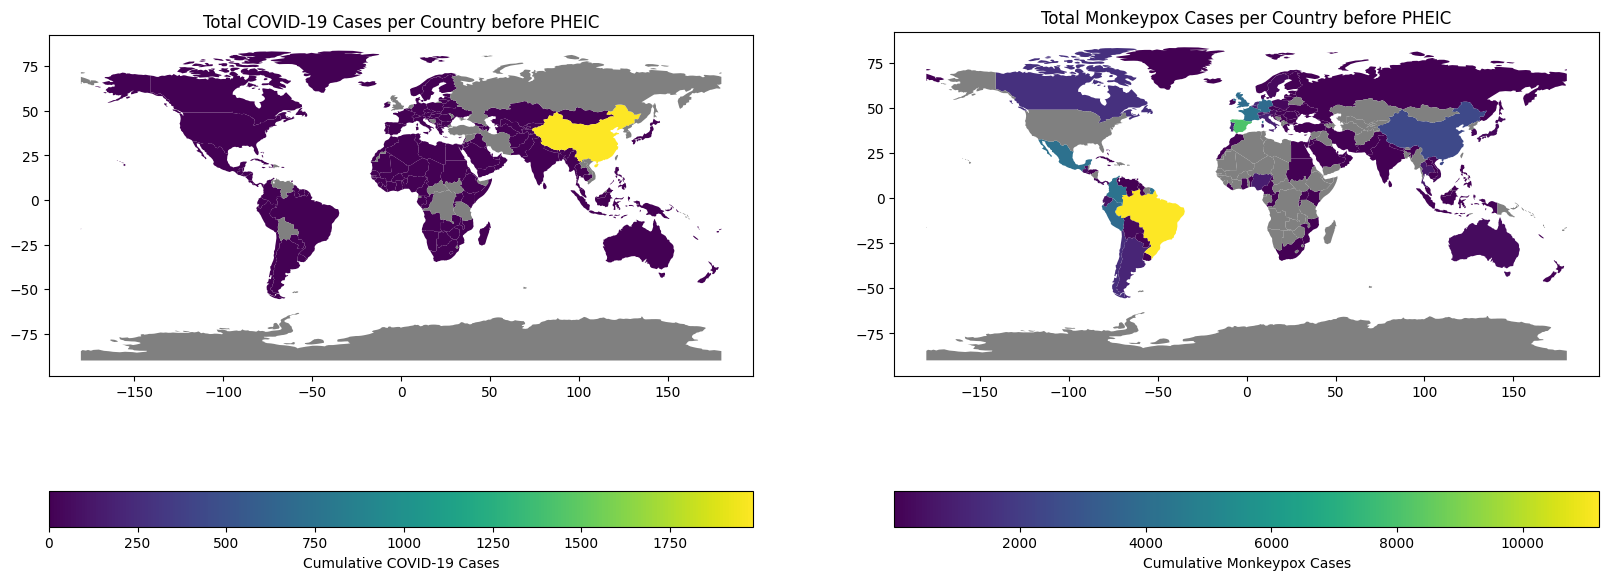

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))


world_covid.plot(column='New_cases', ax=ax[0], legend=True,
                 legend_kwds={'label': "Cumulative COVID-19 Cases",
                              'orientation': "horizontal"})
world_covid[world_covid['New_cases'].isnull()].plot(ax=ax[0], color='gray', label='Countries with no cases')
ax[0].set_title('Total COVID-19 Cases per Country before PHEIC')



world_monkeypox.plot(column='new_cases', ax=ax[1], legend=True,
                     legend_kwds={'label': "Cumulative Monkeypox Cases",
                                  'orientation': "horizontal"})
world_monkeypox[world_monkeypox['new_cases'].isnull()].plot(ax=ax[1], color='gray', label='Countries with no cases')
ax[1].set_title('Total Monkeypox Cases per Country before PHEIC')

plt.show()